# Data Instantiation

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = iris.target

# modeling

## Instantiate

In [24]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

y_train.value_counts()
y_test.value_counts()

2    15
1    15
0    15
Name: species, dtype: int64

## Fit

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predict

In [26]:
pred = knn.predict(X_test)
pred[:5]

array([2, 0, 0, 1, 1])

# Probability Prediction

In [27]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [28]:
pred[10:12]

array([0, 2])

In [29]:
(pred==y_test.values).sum() # should have a divisor (/) but its invalid syntax
y_test.size

45

In [30]:
knn.score(X_test, y_test)

0.9777777777777777

In [31]:
confusion_matrix(y_test, pred, labels=[0,1,2]) # 'iris-setosa', 'iris-versicolor', 'iris-virginica'

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

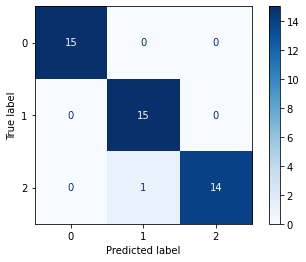

In [32]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Cross Val Score

In [33]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [34]:
cv_scores.mean()

0.9533333333333334

# Grid Search CV

In [35]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2,10)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [36]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [37]:
knn_gscv.best_score_

0.9666666666666668

# Final model

In [38]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])


In [39]:
knn_final.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred = knn_final.predict(X)

In [41]:
knn_final.score(X, y)

0.9733333333333334

 # Label prediction with new data

In [42]:
new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1, -1)
knn_final.predict(np.array(new_data)) # array([1]) is iris-versicolor

array([1])

# Probability Prediction with new Data

In [44]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
knn_final.predict(new_data)

array([1, 2, 0])

In [45]:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

# Dataframe Anaysis

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.groupby('species').size()

In [ ]:
df['species'].value_counts()

# Dataframe Visualization

In [ ]:
df.hist(figsize=(10,8))
plt.show()

# multivariate plot Visualization

In [ ]:
# Optimal solution with pre-existing libraries sourced from comments.

pd.plotting.scatter_matrix(df, figsize=(15, 15), marker='o')
plt.show() # For visualizing the Graph only.

In [ ]:
# Sololearn comment

plt.scatter(features[0],features[1], c=iris.target, marker='.')
plt.show()

In [ ]:
# Incompatible Sololearn snippet

inv_name_dict = {
    'iris-setosa' : 0, 'iris-versiolor' : 1, 'iris virginica' : 2
}

colors = [inv_name_dict[item] for item in df['species']]

scatter = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = colors)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

In [ ]:
# Incompatible Sololearn snippet

scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()